<a href="https://colab.research.google.com/github/csce585-mlsystems/tutorials/blob/main/intro_to_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
## Install and import anything required. Capture hides the output from the cell.
# @title Install and import required packages. (Run Cell)
!pip install -q clu

import jax
import jax.numpy as jnp
import flax
import flax.linen as nn
from typing import NamedTuple, Any, Dict

import matplotlib.pyplot as plt
import numpy as np

from clu import parameter_overview

from sklearn.datasets import fetch_openml

from IPython.display import HTML, Math

In [5]:
# Load the MNIST digits dataset
mnist = fetch_openml(name='mnist_784', version=1, as_frame=False, parser='auto')
# Extract the data and labels
images, labels = mnist.data, mnist.target

# Convert labels to integers (they are originally stored as strings)
labels = labels.astype(int)

# Print shapes of the data
print(f"Images have shape: {images.shape}, and labels have shape: {labels.shape}")

# Verify that we have 10 classes
print(f"Number of classes is: {len(np.unique(labels))}")

# Print the min and max values of the images
print(f"Minimum value in images is: {np.min(images)}")
print(f"Maximum value in images is: {np.max(images)}")

Images have shape: (70000, 784), and labels have shape: (70000,)
Number of classes is: 10
Minimum value in images is: 0
Maximum value in images is: 255


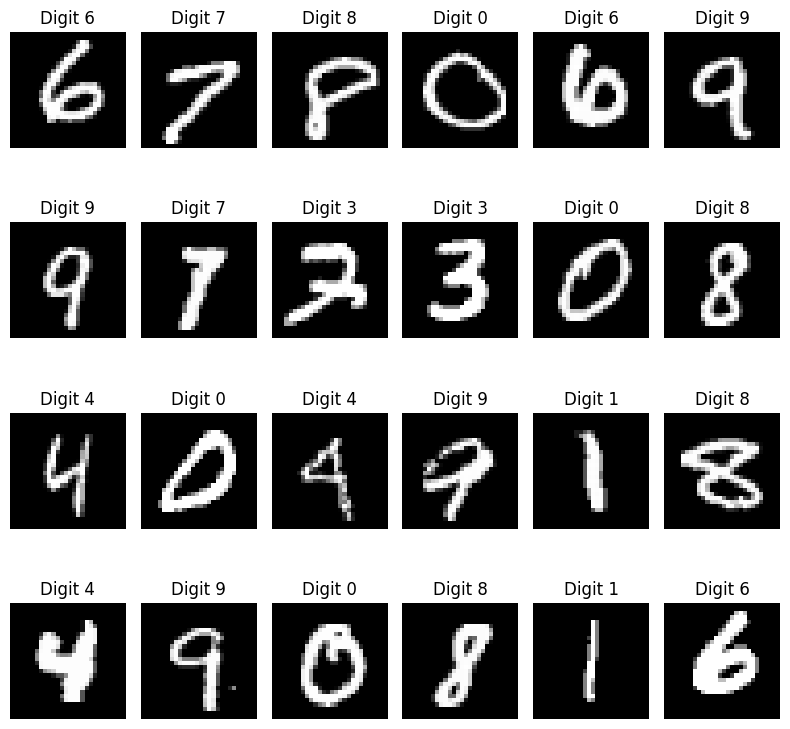

In [6]:
# @title Plot images
def plot_images(images, labels):
  rows = 4
  cols = 6
  num_images = images.shape[0]

  fig, axes = plt.subplots(rows, cols, figsize=(8, 8))

  for ir in range(rows):
    for ic in range(cols):
      sample = np.random.randint(0, num_images)
      image = images[sample].reshape(28, 28)
      axes[ir, ic].imshow(image, cmap='gray')
      axes[ir, ic].axis('off')
      axes[ir, ic].set_title(f"Digit {labels[sample]}")

  plt.tight_layout()
  plt.show()

plot_images(images, labels)

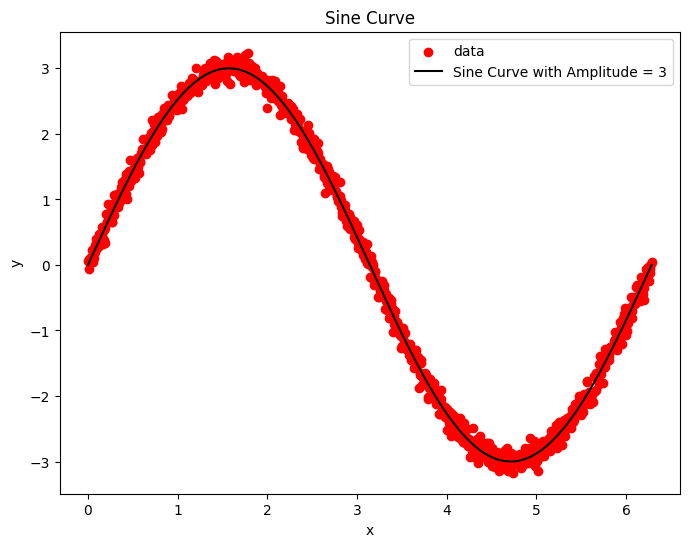

In [7]:
# @title Helper code to plot a Sine curve
amplitude = 3
x = np.linspace(0, 2*np.pi, 1000)
y = amplitude*np.sin(x) + np.random.randn(1000)*0.1   # Calculate y values using the sine function
yfit = amplitude*np.sin(x)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="data", color='red')
plt.plot(x, yfit, label=f'Sine Curve with Amplitude = {amplitude}', color='black')
plt.title('Sine Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# plt.grid()
plt.show()

In [8]:
# Example implementation of a linear function computation.
x.shape[0]

x_key = jax.random.PRNGKey(0)
dim = 10
x = jax.random.uniform(x_key, (dim,))

w_key = jax.random.PRNGKey(1)
w = jax.random.uniform(w_key, (dim,))

b_key = jax.random.PRNGKey(2)
b = jax.random.uniform(b_key, (1,))

y = jnp.dot(w,x) + b  # can also be achieved using: y = x @ w + b

In [9]:
w.shape[0]

10

In [10]:
# @title Run this to generate the data
# store the parameters in a dictionary
params = dict(w=w, b=b)

batch_size = 5
X = jax.random.uniform(x_key, (batch_size, dim))
data = jax.random.uniform(x_key, (batch_size,))

In [11]:
def linear_model(params: Any, X: jnp.ndarray) -> jnp.ndarray:
  # complete this code
  w = params['w']
  b = params['b']

  # compute m = f(x) here using w,b and X
  m = X @ w + b

  return m


In [12]:
def test_linear_model():
  assert (linear_model(params, X) == X @ w + b).all()
  print("Nice! Your answer looks correct.")

test_linear_model()

Nice! Your answer looks correct.


In [13]:
w.shape[0]

10

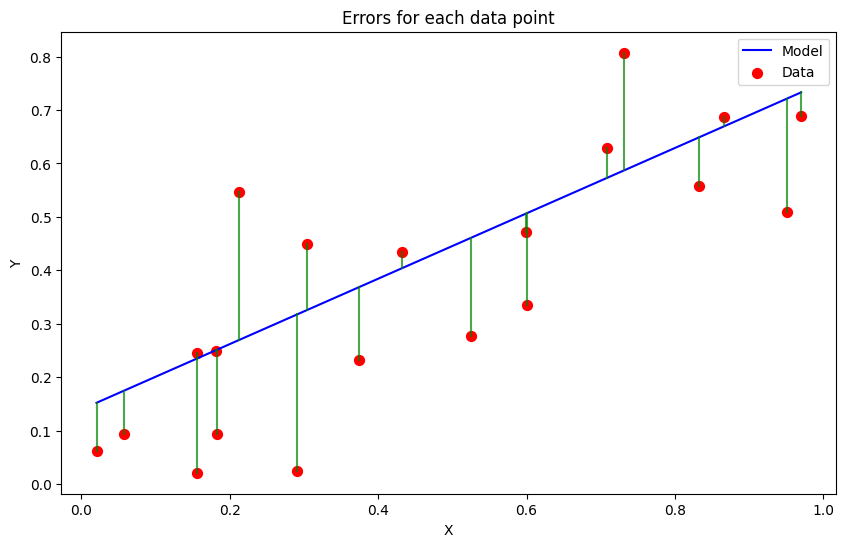

In [14]:
# @title Helper code to plot errors

# Set random seed for reproducibility
np.random.seed(42)

# Number of points to generate
num_points = 20

# Generate random points and lines
points_x = np.random.rand(num_points)
slope_random_line = np.random.rand()
intercept_random_line = np.random.rand()

points_y = slope_random_line*points_x + intercept_random_line + np.random.normal(0, 1, num_points)*0.15

# Function to calculate distance from point (x, y) to the line y = mx + b
def distance_to_line(x, y, m, b):
    return abs(y - m * x - b) / np.sqrt(1 + m**2)

# Calculate distances from each point to the random line
distances = distance_to_line(points_x, points_y, slope_random_line, intercept_random_line)

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot the random line
plt.plot(np.sort(points_x), slope_random_line * np.sort(points_x) + intercept_random_line, c='blue', label='Model')

# Plot the points
plt.scatter(points_x, points_y, c='red', label='Data', marker='o', s=50)

# Plot lines from each point to the random line (in different colors)
for i in range(num_points):
    plt.plot([points_x[i], points_x[i]], [points_y[i], slope_random_line * points_x[i] + intercept_random_line],
             c='green', alpha=0.7)

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Errors for each data point")
plt.legend()
plt.show()

Consider the figure above with data points in red. If the blue line is our model, then vertical green lines represent the errors we make on each data point. The loss function tries to capture the total error we make for every data point. One loss function we can use in this case is the <font color='red'>mean square error</font> between the predicted and the true values. This is equivalent to summing up all the distances in green. This can be written mathematically as follows:
$ \mathcal{L}(\mathbb{θ}) \, = \, \frac{1}{m}∑_{i}({y_i - \hat{y}_i})^2,$
where $\mathbb{θ} = [\mathbf{w}, b]$,  $\mathcal{L}$ denotes the loss function, $\hat{y}$ represents the predicited value by the model and $m$ is the total number of datapoints.

Inserting the formula for a linear model, we obtain the following equation:

$\mathcal{L}(\mathbb{θ}) \, = \, \frac{1}{m}∑_{i}(y_i - \mathbf{w}^T\mathbf{x}_i - b)^2. $

<font color='red'>Note: they are different loss functions we could use in this case. You can see some other common loss functions [here](https://www.geeksforgeeks.org/ml-common-loss-functions/).</font>

In [15]:
def loss_fn(params: Dict[str, jnp.array], X: jnp.array, y: jnp.array):
  # complete this code

  pred = linear_model(params, X)

  loss = jnp.mean((pred-y)**2)

  return loss

🎯 **What is optimization?**

Optimization as the name entails is the process of finding the optimal parameters of the model, i.e. the set of parameters that gives the minimum loss possible. Mathematically this is represented as follows

$$\hat{\theta} \,= \, \underset{\mathbf{\theta}}{\operatorname{argmin}} \frac{1}{m}∑_{i}(y_i - \mathbf{w}^T\mathbf{x}_i - b)^2.$$

<font color='red'> How do we optimise </font>: The figure below is an example plot of the loss at different values of $\mathbf{w}$ and $b$ for a straight line. The minimum value is indicated with the star. Our goal in optimization is to identify this point.   

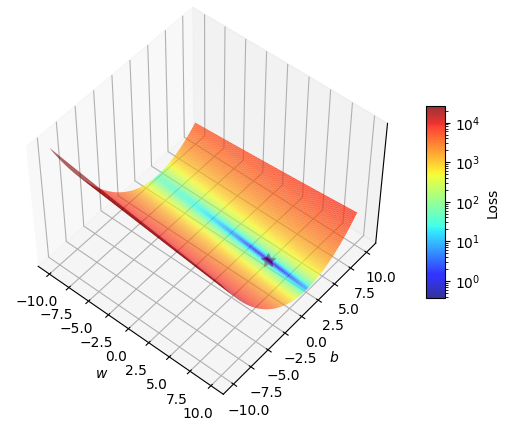

In [16]:
# @title Helper code (to visualise loss landscape)
# Define the loss function (Mean Squared Error)
from matplotlib.colors import LogNorm

def loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Create a grid of weight (slope) and bias (intercept) values
weight_values = np.linspace(-10, 10, 200)
bias_values = np.linspace(-10, 10, 200)
weight_grid, bias_grid = np.meshgrid(weight_values, bias_values)

# Generate random data points for demonstration
np.random.seed(0)
x = np.linspace(0, 20, 200)
y_true = 3 * x + 5 + 0.1 * np.random.normal(0, 1, 200)
y_min = 3*x + 5
minima = np.array([5, 3])
loss_min = loss_function(y_true, y_min)

# Compute the loss for each combination of weight and bias values
loss_grid = np.zeros_like(weight_grid)
for i in range(len(weight_values)):
    for j in range(len(bias_values)):
        y_pred = weight_values[i] * x + bias_values[j]
        loss_grid[i, j] = loss_function(y_true, y_pred)

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

surf = ax.plot_surface(weight_grid, bias_grid, loss_grid, norm=LogNorm(), rstride=1, cstride=1,
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima, loss_min, 'r*', markersize=10)

ax.set_xlabel('$w$')
ax.set_ylabel('$b$')
# Remove z-axis ticks and labels
ax.set_zticks([])
ax.set_zticklabels([])

# Add color bar for reference
cbar = plt.colorbar(surf, shrink=0.5, aspect=10)
cbar.ax.set_ylabel('Loss')

# ax.set_xlim((xmin, xmax))
# ax.set_ylim((ymin, ymax))
plt.show()

A **brute force** approach will be to compute the loss function for a large range of possible parameter values and select the parameters with the minimum loss value. While such an approach can work for simple models with 1 or 2 parameters, this is a very tedious approach and the number of possible values to evaluate for large models makes such an approach impractical.

**Gradient based optimization**

The right approach is to use calculus. The derivative of a function is known to be 0 at every turning point (maximum and minimum turning points). Hence to find $\theta$, which minimises the loss, we need to solve the equation
$$\frac{\partial \mathcal{L}}{\partial \theta} \,=\, 0.$$

**Exercise 2:** [OPTIONAL] Can you work out the following expressions for the derivatives of the loss function?

$$\frac{∂ \mathcal{L}}{\partial \mathbf{w}} = \frac{2}{m}∑_{i}\mathbf{x}_i(\mathbf{w}^T\mathbf{x}_i + b - y_i),$$

$$\frac{∂ \mathcal{L}}{\partial b} = \frac{2}{m}∑_{i}(\mathbf{w}^T\mathbf{x}_i + b - y_i).$$

Solution here in the [Appendix](#scrollTo=kh_8f4gKyufu).

Fortunately, we do not need to compute these analytical expressions or implement them ourselves from scratch. Machine learning frameworks like Jax, [Pytorch](https://pytorch.org/tutorials/) and [Tensorflow](https://www.tensorflow.org/) have highly optimised tools that will compute these for us. In the case of Jax, we can use the function `jax.grad` to compute the derivative of a function with respect to its parameters.

In [18]:
# @title Computing derivatives with jax.grad
# Computing derviatives with jax

def quadratic_fn(x):
  return x**2


# Compute the derivative of quadratic_fn when x = 1
grad_fx =  jax.grad(quadratic_fn)(1.0)
assert grad_fx == 2.0
print(f"Gradient of the function x**2 at x = 1 is {grad_fx} as expected.")

Gradient of the function x**2 at x = 1 is 2.0 as expected.


Importantly Jax computes the derivative in the same way even if our parameters are passed in a different data type, such as a dictionary. For example, we can compute the gradient of our loss function above as follows.

In [19]:
# Compute derivatives of the loss_fn with respect to params

grads = jax.grad(loss_fn)(params, X, data)
print(f"gradients: {grads}")

gradients: {'b': Array([4.6627536], dtype=float32), 'w': Array([2.091345 , 1.9300239, 2.740008 , 2.705566 , 1.4073546, 1.8641709,
       1.5042092, 3.331741 , 2.4481251, 2.5431075], dtype=float32)}


In [20]:
data

Array([0.57450044, 0.09968603, 0.39316022, 0.8941783 , 0.59656656],      dtype=float32)

In [21]:
X

Array([[0.42271078, 0.10988367, 0.17936432, 0.557727  , 0.5007241 ,
        0.22675169, 0.2110933 , 0.54872036, 0.4301901 , 0.8549892 ],
       [0.40325677, 0.21874166, 0.65812516, 0.7035849 , 0.08702171,
        0.0146271 , 0.39282465, 0.9139857 , 0.6217127 , 0.63578844],
       [0.35615385, 0.60827816, 0.8881558 , 0.3827777 , 0.03948212,
        0.94029844, 0.2988342 , 0.5517082 , 0.09887683, 0.08440983],
       [0.7204071 , 0.67677045, 0.51662374, 0.47618616, 0.62078416,
        0.5653542 , 0.4790753 , 0.8785478 , 0.9574187 , 0.6435374 ],
       [0.17340672, 0.45538437, 0.7655853 , 0.8188056 , 0.16407394,
        0.37448525, 0.07771182, 0.45887375, 0.1897943 , 0.34695685]],      dtype=float32)

Another similar function in Jax is `jax.value_and_grad` which returns both the value of the function and the gradient.

In [22]:
# Compute derivatives of the loss_fn with respect to params

loss, grads = jax.value_and_grad(loss_fn)(params, X, data)
print(f"loss: {loss}")
print(f"gradients: {grads}")

loss: 5.745656490325928
gradients: {'b': Array([4.6627536], dtype=float32), 'w': Array([2.091345 , 1.9300239, 2.740008 , 2.705566 , 1.4073546, 1.8641709,
       1.5042092, 3.331741 , 2.4481251, 2.5431075], dtype=float32)}


#### Training the model using Jax

**Gradient descent:**

Now we have all the basic pieces required to train a machine learning model. Recall the goal is to find the parameters that will make the loss as small as possible. This can be achieved by following the gradient in the direction that reduces the loss. One popular algorithm for this in machine learning is the use of <font color='red'>gradient descent algorithm</font>. The algorithm works as follows:

1.   Initialise the parameters with random values.
2.   Loop for a number of iterations and during each iteration update the parameters using the following formula.

$$ \mathbf{\theta} = \mathbf{\theta} - η\frac{∂\mathcal{L}}{∂\theta},$$
$\eta$ is called the learning rate. It is a hyperparameter of the gradient descent algorithm meaning we have to choose it beforehand.

Intuitively, if the current parameters are the optimal parameters then the gradients, $\frac{\partial \mathcal{L}}{\partial \theta}$ will be zero and the parameters will stop changing. Hence one stopping criterion which we can use during training is checking when the parameters stop changing also known as convergence. When a single data point is used at every iteration to compute the gradient the algorithm is called <font color='red'>stochastic gradient descent</font>. When the entire training data is used the algorithm is called <font color='red'>batch gradient descent</font>. Traditionally the best approach is to use small chunks of the data at each step. This approach is called the <font color='red'>mini-batch gradient descent</font>. Most often in practice, people use the term stochastic gradient descent but they actually mean mini-batch gradient descent.

Thus during training, we will loop through the datasets for each iteration. When we loop through the entire dataset we called that an epoch. Hence another familiar hyperparameter is the epoch.



In [25]:
# @title Code demonstration: Batch gradient descent implementation
def batch_gradient_descent(loss_fn, params, training_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=10):
  """Batch gradient descent basic jax implementation.

  Args:
    loss_fn
      the loss function for our model.
    params:
      the initial parameters of the model.
    training_data
      a tuple with the features and targets for training.
    val_data
      a tuple with the features and targets for validation.
    learning_rate
      learning rate
    num_epochs
      number of epochs
    batch_size:
      size of every mini batch
  """

  X_train, y_train = training_data
  X_val, y_val = val_data

  num_samples, num_features = X_train.shape

  # Create empty list to store the training and validation loss.
  loss_train = [] # training loss
  loss_val  = [] # valisation loss

  # Define a function that computes loss and gradients
  loss_and_grad = jax.value_and_grad(loss_fn)

  n_iter = 0 # number iterations
  for epoch in range(num_epochs):
    # Shuffle the data before every epoch
    shuffled_indices = np.arange(num_samples)
    np.random.shuffle(shuffled_indices)

    for start_idx in range(0, num_samples, batch_size):
      end_idx = start_idx + batch_size
      if end_idx > num_samples:
        end_idx = num_samples

      batch_indices = shuffled_indices[start_idx:end_idx]
      X_batch = X_train[batch_indices]
      y_batch = y_train[batch_indices]

      # Compute loss and gradients using value_and_grad
      loss, grads = loss_and_grad(params, X_batch, y_batch)
      loss_train.append(loss)

      # Compute the validation loss
      loss_v = loss_fn(params, X_val, y_val)
      loss_val.append(loss_v)

      # Update the parameters
      params = jax.tree_map(lambda p, g: p -learning_rate*g, params, grads)

      # Update the iter count
      n_iter += 1


  # Plot training and validation loss
  iters = range(1, n_iter+1)
  plt.plot(iters, loss_train, label='Training Loss')
  plt.plot(iters, loss_val, label='Validation Loss')
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()

  # Display the plot
  plt.show()

  return params

In [26]:
# @title Let's create some dummy data to test the code
def create_dummy_data_linear_regression():
  """We will generate some random data using our linear function above to test the gradient decent implementation"""

  num_samples = 200
  num_features = 1  # Modify this to have more features

  # Generate random X values in the range [0, 10] for each feature
  key = jax.random.PRNGKey(0)
  X = jax.random.uniform(key, (num_samples, num_features), minval=0, maxval=10)

  # Generate y values based on a linear relationship with some noise
  w = jnp.array([3.0]*num_features)  # True coefficients for each feature
  b = jnp.array([5.0])

  params = dict(w=w, b=b)
  y = linear_model(params, X)

  # Add some noise
  noise = jax.random.normal(key, shape=(num_samples,))*0.30
  y = y + noise

  # Step 2: Split the data into training and validation sets
  train_fraction = 0.8
  num_train_samples = int(train_fraction * num_samples)

  # Shuffle the indices to randomly split the data
  key, subkey = jax.random.split(key)
  shuffled_indices = jax.random.permutation(subkey, jnp.arange(num_samples))

  # Split the indices into training and validation sets
  train_indices = shuffled_indices[:num_train_samples]
  val_indices = shuffled_indices[num_train_samples:]

  # Get the corresponding data points for training and validation sets
  X_train, y_train = X[train_indices], y[train_indices]
  X_val, y_val = X[val_indices], y[val_indices]

  train_data = (X_train, y_train)
  val_data = (X_val, y_val)

  # create some random initial params
  w_init = jax.random.normal(key, shape=(num_features,))
  b_init = 0.0
  initial_params = dict(w=w_init, b=b_init)

  return train_data, val_data, initial_params


def plot_linear_fit(params, X, y):
  """Overlay the data and fitted model"""

  y_pred = linear_model(params, X).squeeze()
  xval = X[:,0]

  plt.figure(figsize=(8, 6))
  plt.scatter(xval, y, label='Data', color='blue')
  plt.plot(xval, y_pred, label='Fit', color='red')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()
  plt.title('Scatter Points and Fitted Curve')
  plt.show()

In [27]:
train_data, val_data, initial_params = create_dummy_data_linear_regression()

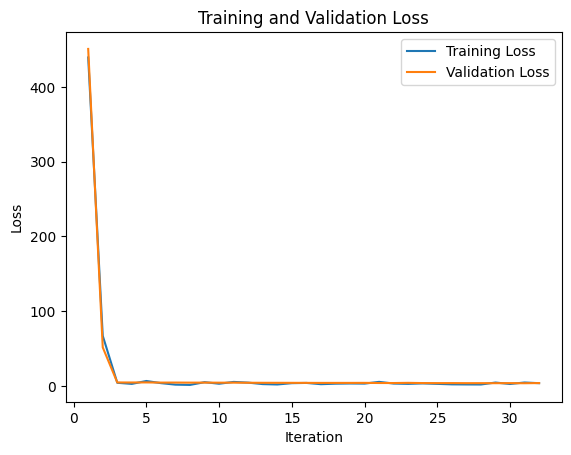

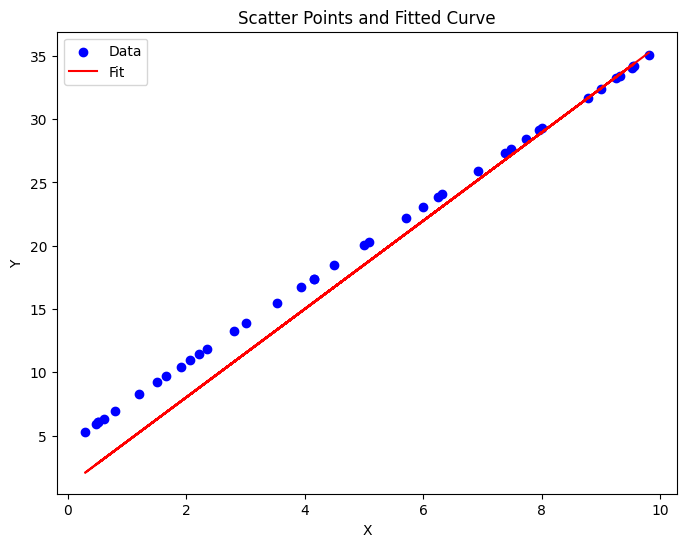

In [28]:
params = batch_gradient_descent(loss_fn, initial_params, train_data, val_data, learning_rate=0.01, num_epochs=2, batch_size=10)

# plot the results on validation data
Xval, yval = val_data
plot_linear_fit(params, Xval, yval)

Our model seems to be **underfitting** that data because the fitted line is going through very few of the points.

**Exercise:** Discuss with your neighbour how we can improve our model.

**Code task:** Modify the learning rate, batch_size and the number of epochs and observe their effects on the results.

**Tips:**
- In practice, people usually choose learning rates in the range of 0.01 and 1e-5.
- Small batch sizes can introduce too much noise in the gradients and this may affect the speed of convergence.
- On the other hand, large batch sizes may take longer to converge because parameters are not updated very frequently.
- Not that using a very high number of epochs will make the training take long because we did not include any stopping criterion.

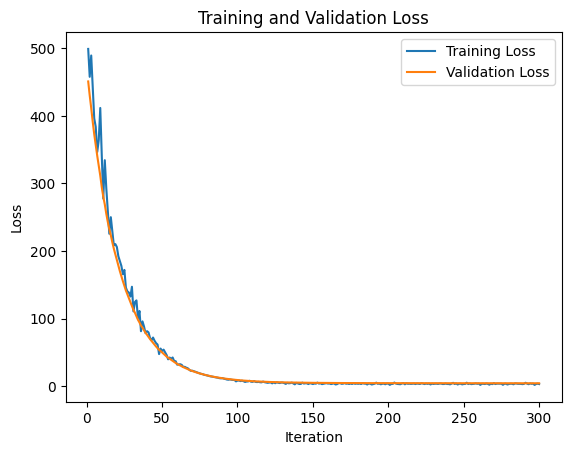

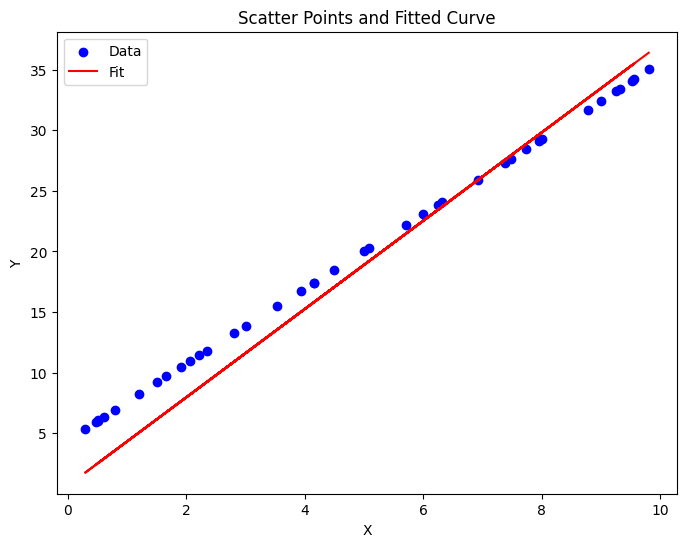

In [32]:
# @title Your code here
learning_rate = 3e-4 #@param {type:"slider", min:1e-5, max:1e-2, step:1e-4}
batch_size = 71 #@param {type:"slider", min:1, max:5000, step:10}
num_epochs = 100 #@param {type:"slider", min:2, max:500, step:20}

params = batch_gradient_descent(loss_fn, initial_params, train_data, val_data, learning_rate=learning_rate, num_epochs=num_epochs, batch_size=batch_size)

# plot the results on validation data
Xval, yval = val_data
plot_linear_fit(params, Xval, yval)

2.2 Non linear regression and neural networks

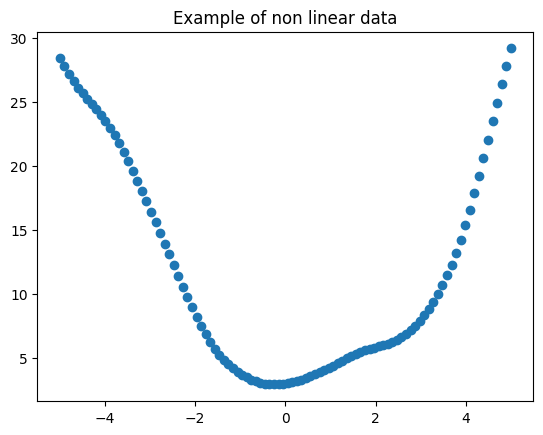

In [33]:
# @title Helper code to plot non-linear data
def plot_nonlinear_data():

  x = np.linspace(-5, 5, 100)
  y = np.cos(x)*x + x**2 + np.exp(-x/7)*3 + 0.3*x*np.sin(x)**4

  plt.scatter(x, y)
  plt.title("Example of non linear data")
  plt.show

plot_nonlinear_data()

Linear regression is a simple and powerful data inference method; however, it has limitations in capturing non-linear relationships. To model such complexities, we require more powerful models. For example, no single line will perfectly fit the data in the above figure. Nonlinear models, such as polynomials, exponentials, and trigonometric functions, offer solutions to this problem.

Before the explosion of deep learning techniques, fitting pre-defined functions to datasets was the go-to machine learning approach. Examples of classical algorithms using this approach include <font color='red'>support vector machines, and naive Bayes</font>, among others.

In this section, we will introduce <font color='red'>neural networks</font> which are at the heart of deep learning techniques and recent successes of machine learning.

#### Model representation




<center>
<img src="https://www.tibco.com/sites/tibco/files/media_entity/2021-05/neutral-network-diagram.svg" width="80%" />
</center>

      Image of a neural network with 3 hidden layers. Credit: https://www.tibco.com/reference-center/what-is-a-neural-network





Neural networks are a powerful class of machine learning models inspired by how the human brain functions. Unlike linear regression, which applies a single transformation to the data, neural networks process input data through a series of transformations before reaching the final predictive layer. The term <font color='red'>Deep Learning</font> arises from the numerous transformations applied to the input data.

In the image above, the circles represent nodes, and the links connecting them represent the model's parameters.

#### Activation functions

Activation functions are essential in neural networks. The input to every node is a linear function of all the nodes from the previous layer. Without applying an activation function, also called a non-linearity, the entire neural network, no matter how many layers it has, reduces to a simple linear model. Thus, activation functions are used to break the linearity and ensure that we build a complex non-linear function.

The equation for node \(i\) in layer \(j\) of a neural network can be expressed as follows:

$$ \text{Output}_{ij} = \text{Activation Function} \left( \sum_{k=1}^{n} \text{Weight}_{ijk} \times \text{Output}_{(j-1)k} + \text{Bias}_{ij} \right)$$

Where:
- $\text{Output}_{ij}$ is the output of node $i$ in layer $j$.
- $\text{Weight}_{ijk}$ is the weight connecting node $i$ in layer $j$ to node $k$ in layer $j-1$.
- $\text{Output}_{(j-1)k}$ is the output of node $k$ in layer $j-1$.
- $\text{Bias}_{ij}$ is the bias term for node $i$ in layer $j$.
- $\text{Activation Function}$ is the chosen activation function that introduces nonlinearity to the output of the neuron.


Some popular activation functions include:

- $\text{ReLU}(x) \, = \, \text{max}(0, x)$

    The Rectified Linear Unit (ReLU) is the most popular activation function. It maps it input to range $[0, ∞]$ mapping all negativie values to 0. Both the function and its derivitate are monotonic. However this activation function has the problem it turns all negative inputs to 0 and their descreases the ability of the model to fit data properly.

- $\text{Sigmoid}(x) \, =\, \frac{1}{1+e^{-x}}$

    The sigmoid activation maps input the range $[0, 1]$. This is ideal for predicting probabilities. The function is differentiable and monotonic but its derivative is not monotonic. Because its derivative is not monotonic it is not ideal to use this activation in hidden layers as it blocks information transfer between layers. Hence most often activation is applied only to output layers.

- $\text{tanh}(x)\, = \, \frac{e^x - x^{-x}}{e^x + e^{-x}},$
  
     The $tanh$ activation is similar to the sigmoid activation but it maps inputs to range $[-1, 1]$. This wider range allows for a much better spread when predicting probabilities. Similarly to the sigmoid activation, the $tanh$ is most often applied to the output layers of neural networks.



Let's implement the popular [ReLU](https://arxiv.org/https://arxiv.org/abs/1803.08375abs/1803.08375) activation function.

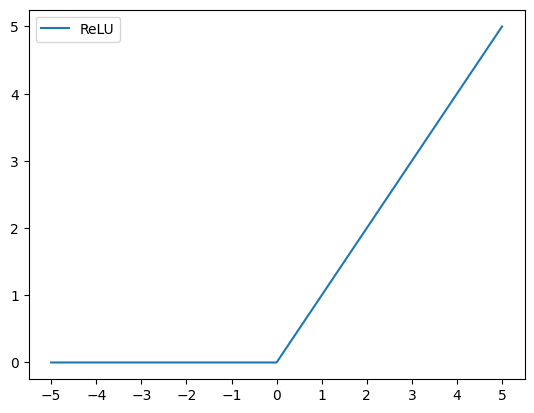

In [34]:
# Implementation of relu using simple python.

def relu(x):
  if x > 0 :
    return x
  else:
    return 0

def plot_activation(act_fn, label="act_fn"):
    max_int = 5
    # Generete 100 evenly spaced points from -max_int to max_int
    x = np.linspace(-max_int, max_int, 1000)
    y = np.array([act_fn(xi) for xi in x])
    plt.plot(x, y, label=label)
    plt.legend(loc="upper left")
    plt.xticks(np.arange(min(x), max(x) + 1, 1))
    plt.show()

plot_activation(relu, label='ReLU')

**Code Task:** Implement and plot another activation function of your choice.

In [ ]:
# @title Your code here
def act_fn(x):
    # type your code here

    y = ...#
    return y

# Call the plotting function
plot_activation(act_fn, label=....) # update this

#### Building a simple neural network model with Jax

Fortunately, they are different high-level modules that can be used to develop deep neural networks and we don't have to implement everything from scratch. For example, for Jax based model we can use [haiku]( https://dm-haiku.readthedocs.io/en/latest/) and [flax](https://flax.readthedocs.io/en/latest/getting_started.html). Moreover, advanced optimisation techniques can be implemented using [optax](https://optax.readthedocs.io/en/latest/). In this section, we will use flax to implement a simple 4 layer neural network.

In [36]:
# @title Code demonstration: building a simple neural network with flax
# Code for a 4-layer neural network using haiku.
# Here assume all the hidden layers have the same number of nodes.
# We will use the same activation relu for all the layers except the last layer.

class Network(nn.Module):
  hidden_size: int
  output_size: int

  @nn.compact
  def __call__(self, x):
    # First layer with ReLU activation
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Second layer
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Third (output) layer with no activation applied
    x = nn.Dense(self.output_size)(x)

    return x

The cell above is a basic example of how we can define a neural network using flax. Each linear transformation is implemented using the `nn.Dense` function, and we use `jax.nn.relu` to apply non-linearities to the output of each layer.

In [37]:
# @title Code demonstration: intialising the model
seed = 32
input_size = 4
hidden_size = 5
output_size = 1

# Calling the build_neural_network function and applying the required transformations
model = Network(hidden_size, output_size)

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

# Let's use the CLU: https://github.com/google/CommonLoopUtils to examine the shape of the parameters
print(parameter_overview.get_parameter_overview(initial_params, include_stats=False))

+-----------------------+--------+------+
| Name                  | Shape  | Size |
+-----------------------+--------+------+
| params/Dense_0/bias   | (5,)   | 5    |
| params/Dense_0/kernel | (4, 5) | 20   |
| params/Dense_1/bias   | (5,)   | 5    |
| params/Dense_1/kernel | (5, 5) | 25   |
| params/Dense_2/bias   | (1,)   | 1    |
| params/Dense_2/kernel | (5, 1) | 5    |
+-----------------------+--------+------+
Total: 61


**Exercise:** Do you understand the shape of the different parameters?

The above cell demonstrates how to create an instance of the model and get initial parameters. After creating an instance of the model using the `Network` class we call the `init` function with a `jax.random.PRNGKey` and some dummy inputs from which the shape of the parameters will be inferred.  

To apply the model to some data we need to call `model.apply` with the current parameters and the input data.

In [38]:
z = model.apply(initial_params, dummy)
print(f"Model ouput shape: {z.shape}, Input shape: {dummy.shape}")

Model ouput shape: (1, 1), Input shape: (1, 4)


## **Classification**
Now that we are familiar with the fundamentals of model fitting and we know how to build neural networks, we will now focus on our original objective and build our mnist digit classifier.

### 3.1 Logistic regression

Linear regression aims to find a function $f$ that maps our **inputs $x$**, where $x \in \mathbb{R}^d$ to the corresponding **output/target - $y$**, where $y \in \mathbb{R}^n$ (output values are continous). Contrary to regression, the **output/target -$y$** can only take on certain values in logistic regression. When the **target** can only take on one of two values, the algorithm is called **Binary Classification**. When we have more than two categories, it is called a **Multi-class Classification**.

Hence the aim of Logistic regression (in the Binary classification case) is to map **inputs $x$**, where $x \in \mathbb{R}^d$ to $y$, where $y \in \{0,1\}$.

For example, if we are building an image classifier for cats and dogs, 1 may be used to represent the target values for cats and 0 for dogs.

#### Logits and sigmoid activation function
The target values for logistic regression problems are discrete. It is not straightforward how to define a model function that outputs discrete values. Hence we design the model to output probabilities instead. Recall that probabilities only lie in the range of values $[0,1]$, thus we need a function that maps the output to probabilities. As mentioned earlier a good activation function we can use in this case is the **Sigmoid** activation function.
<br>
<center>
 $$\sigma(x) = \frac{1}{1+e^{-x}}$$

 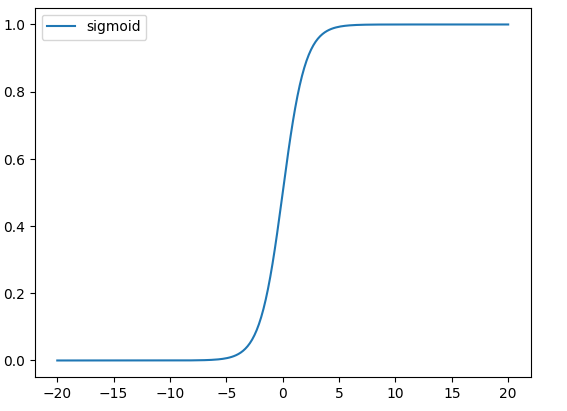
</center>
<br>
<br>


**Cross entropy loss function**

In binary classification, we can only have one of two values for the targets. Using the mean square error as before generally doesn't perform well in logistic regression. The most common loss function that works best for logistic regression problems is the <font color='red'>cross entropy loss function</font> defined as follows:
<br>
<center>
 $$ -y_i \log(p_i) - (1-y_i) \log (1-p_i),$$
</center>
where $p_i = \sigma (z)$ with $z$ being the output of our model function.
<br>

**Code task**:
1. Implement the sigmoid activation function.
2. Implement the cross entropy loss function.


In [39]:
def sigmoid(x):
    """sigmoid function 1/1+e^-x"""

    prob = ... # update me

    return prob

In [40]:
# @title Run me to test your code
def test_sigmoid_fn():
  x  = np.array([0.7, 0.3, 0.8, 0.2])
  assert jnp.allclose(sigmoid(x), jax.nn.sigmoid(x)), "Test failed!"
  print("Nice! Your answer looks correct!")

  return

In [41]:
# @title sigmoid solution (Try not to peek until you've given it a good try!')
def sigmoid(x):
  prob = 1/(1+jnp.exp(-x))

  return prob

In [42]:
def cross_entropy_loss(predictions, targets):
    # you need to make sure we never have log of 0

    # use sigmoid to compute the probs from the predicitions
    probs = ... # update me

    # your code here
    loss = ... # update me

    return loss

In [ ]:
  # @title Run me to test your code
  def test_cross_entropy_loss():
    predictions = np.array([0.7, 0.3, 0.8, 0.2])
    targets = np.array([1, 0, 1, 0])

    # Expected cross-entropy loss for the test data
    expected_loss = 0.60669523

    # Calculate the cross-entropy loss using the implemented function
    computed_loss = cross_entropy_loss(predictions, targets)

    assert jnp.isclose(computed_loss, expected_loss), "Test failed!"

    # If the assert statement does not raise an exception, the test is passed.
    print("Nice! Your anwser looks correct")

    return

  test_cross_entropy_loss()

In [44]:
# @title Cross entropy loss solution (Try not to peek until you've given it a good try!')
def cross_entropy_loss(preds, targets):
    eps = 1e-15
    probs = sigmoid(preds)

    loss = -targets*jnp.log(probs+eps) - (1-targets)*jnp.log(1-probs+eps)

    return jnp.mean(loss)

#### Extending to Multi-class classification

In multi-class classification, the machine learning model is designed to handle more than two classes, where each class represents a different category or label. For example, in the case of a single-digit classifier, there are 10 classes, each corresponding to a digit from 0 to 9.

The model's output is typically a probability distribution over all possible classes, with each class having an associated probability. The dimensions of the output vector match the number of classes, so for a classifier with 3 different classes, the output vector will have a dimension of 3.

To make a prediction, the model selects the class with the highest probability as the predicted class for the input data point.

**One-hot encoding**

One-hot encoding is a common technique used to represent categorical variables, such as class labels, as binary vectors. In the case of multi-class classification with 3 classes, the targets are transformed into one-hot encoded vectors as follows:

Class 1: [1, 0, 0]: This means the data point belongs to class 1, and the first element in the vector is set to 1, while the other elements are set to 0.

Class 2: [0, 1, 0]: This means the data point belongs to class 2, and the second element in the vector is set to 1, while the other elements are set to 0.

Class 3: [0, 0, 1]: This means the data point belongs to class 3, and the third element in the vector is set to 1, while the other elements are set to 0.

We can use `jax.nn.one_hot` function to one-hot encode our data.


In [45]:
# An example using one hot encoding
num_classes =  3
targets = jnp.array([2, 0, 1])
one_hot_targets = jax.nn.one_hot(targets, num_classes)
print(f"Example of One hot encordings: {one_hot_targets}")

Example of One hot encordings: [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


**Exercise**: Discuss with your neighbour how we should define the loss function in the case of multi-class classification.

**Solution**: The loss function for a multi-classification is computed similarly to that of a binary classifier. However in this case we define the loss as the sum of the loss for each of the individual classes.
<br>
<center>
 $$ \sum_c -y^c_i \log(p^c_i),$$
</center>
where $p^c_i = \text{softmax}(z) = \frac{e^{z^c_i}}{\sum_c e^{z^c_i}}$ with $z$ being the output of our model function.
<br>
The main difference here is that we use a $\text{softmax}$ activation function instead of $\text{sigmoid}$ as for the binary case.

**Exercise 3 [OPTIONAL]**: Do your get the initution why this formula is similar to that for the binary case?

**Solution**: Scroll to the [Appendix](#scrollTo=fRYbQvz01Zlm).

**Code task**:
  1. Implement the softmax activation function
  2. Implement a cross entropy loss function for multiclass classification using softmax and one hot encoding.

In [46]:
def softmax(logits):
  """Compute softmax: `exp(x)/sum(exp(x))`

  Args:
    logits: array of shape (num_samples, num_classes)

  Return:
    probs: array of shape (num_samples, num_classes)
  """

  # your code here
  # make sure you sum across the right axis

  probs = ... # update me

  return probs

In [ ]:
# @title Run me to test your code
def test_softmax():
  x = jnp.array([[1.0, 0.4, 0.3], [10.0, 4.6, 8.9]])
  assert jnp.allclose(softmax(x), jax.nn.softmax(x, axis=-1))
  print("Nice! Your answer looks correct.")

test_softmax()

In [48]:
# @title softmax solution (Try not to peek until you've given it a good try!')
def softmax(logits):
  exp_logits = jnp.exp(logits)
  return exp_logits / jnp.sum(exp_logits, axis=-1, keepdims=True)

In [49]:
def cross_entropy_softmax_loss(predictions, targets):
    """Compute the cross entropy softmax loss function

      Args:
        predictions: (num_samples, num_classes)
        targets: (num_samples)
    """

    # Compute the softmax probabilities
    probs = ... # update me

    num_classes = ... # update me

    # One-hot encode the targets
    targets_one_hot = ... # update me

    # Compute the cross-entropy loss
    eps = 1e-15
    probs += eps # to avoid calling log with 0 values

    loss = ... # update me

    return loss

In [ ]:
# @title Run me to test your code
def test_cross_entropy_softmax_loss():
  # Fixed predictions (logits) for each class
  predictions = jnp.array([[1.5, 0.3, 2.7],
        [0.8, 1.2, 3.1], [2.3, 1.7, 0.5],
        [3.0, 0.5, 1.2], [0.2, 2.8, 1.0]])

  # Fixed true class labels
  targets = jnp.array([2, 1, 0, 0, 2])

  # Expected loss computed manually
  expected_loss = 1.0456787

  # Compute the cross-entropy softmax loss using your implementation
  loss = cross_entropy_softmax_loss(predictions, targets)

  # Check if the computed loss matches the JAX built-in loss
  assert jnp.allclose(loss, expected_loss), "Loss value do not match!"

  print("Nice! Your answer looks correct.")

test_cross_entropy_softmax_loss()

In [50]:
# @title Cross entropy softmax solution (Try not to peek until you've given it a good try!')
def cross_entropy_softmax_loss(predictions, targets):
    """Compute the cross entropy softmax loss function

      Args:
        predictions: (num_samples, num_classes)
        targets: (num_samples)
    """

    # Compute the softmax probabilities
    probs = softmax(predictions) # update me

    num_classes = predictions.shape[-1]

    # One-hot encode the targets
    targets_one_hot = jax.nn.one_hot(targets, num_classes) # update me

    # Compute the cross-entropy loss
    eps = 1e-15
    probs += eps # to avoid calling log with 0 values

    loss_i = jnp.sum(-targets_one_hot*jnp.log(probs), axis=-1) # update me

    return jnp.mean(loss_i)

#### Building a simple neural network for classification

In this section, we will assemble all the pieces and train a deep neural network for classification. Let's recall all the tools we mentioned initially that are necessary to train a machine learning model.

1. Dataset: we need to have a dataset which we will split into training and validation sets in the ratio 80:20.
2. A model function.
3. A loss function.
4. An optimisation algorithm.

We will load the data using [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html). We have not discussed data preprocessing but in practice, we usually have to preprocess our datasets before using them for training. Such steps may include for example visualising the data to have intuition, identifying outliers, transforming and even dropping some features.

In [52]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import jax
import jax.numpy as jnp
from typing import NamedTuple, Any

import matplotlib.pyplot as plt
import numpy as np

# Let re-adapt our batch gradient descent function
def batch_gradient_descent(loss_fn, params, training_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=10):
  """Batch gradient descent basic jax implementation.

  Args:
    loss_fn
      the loss function for our model.
    params:
      the initial parameters of the model.
    training_data
      a tuple with the features and targets for training.
    val_data
      a tuple with the features and targets for validation.
    learning_rate
      learning rate
    num_epochs
      number of epochs
    batch_size:
      size of every mini batch
  """

  X_train, y_train = training_data
  X_val, y_val = val_data

  num_samples, num_features = X_train.shape

  # Create empty list to store the training and validation loss.
  loss_train = [] # training loss
  loss_val  = [] # valisation loss

  # Define a function that computes loss and gradients
  loss_and_grad = jax.value_and_grad(loss_fn)

  for epoch in range(num_epochs):
    # Shuffle the data before every epoch
    shuffled_indices = np.arange(num_samples)
    np.random.shuffle(shuffled_indices)

    loss_train_epoch = []

    for start_idx in range(0, num_samples, batch_size):
      end_idx = start_idx + batch_size
      if end_idx > num_samples:
        end_idx = num_samples

      batch_indices = shuffled_indices[start_idx:end_idx]
      X_batch = X_train[batch_indices]
      y_batch = y_train[batch_indices]
      # Compute loss and gradients using value_and_grad
      loss, grads = loss_and_grad(params, X_batch, y_batch)
      loss_train_epoch.append(loss)

      # Update the parameters
      params = jax.tree_map(lambda p, g: p -learning_rate*g, params, grads)

    # We need to turn the list in to an array before applying jnp.mean
    mean_loss = jnp.mean(jnp.array(loss_train_epoch))
    loss_train.append(mean_loss)

    # Compute the validation loss at the end of the epoch
    loss_v = loss_fn(params, X_val, y_val)
    loss_val.append(loss_v)

  # Plot training and validation loss
  epochs = range(1, num_epochs+1)
  plt.plot(epochs, loss_train, label='Training Loss')
  plt.plot(epochs, loss_val, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()

  # Display the plot
  plt.show()

  return params

# Load the mnist dataset
def load_dataset(seed):
  mnist = fetch_openml(name='mnist_784', version=1, as_frame=False, parser='auto')
  # Extract the data and labels
  images, labels = mnist.data, mnist.target

  # These images consist of integer values from 0 to 255.0
  # We scale the images to min and max of 1
  x_max = 255.0
  x_min = 0.0

  images = (images - x_min)/(x_max - x_min)
  images = images.astype(jnp.float32)
  labels = labels.astype(jnp.float32)

  # These are images of shape 28x28 which have been flatten to shape 784
  X_train, X_test, y_train, y_test = train_test_split(
      images, labels, test_size=0.2, train_size=0.8, random_state=seed
  )

  train_dataset = (X_train, y_train)
  test_dataset = (X_test, y_test)

  return train_dataset, test_dataset

training_data, val_data = load_dataset(32)

**Code task:**
1. Build a neural network that outputs logits for each of the 10 classes.
2. Initialise your model with some dummy input.
3. Define your softmax cross entropy function.

In [ ]:
# @title Your code here
class Network(nn.Module):
  hidden_size: int
  output_size: int

  @nn.compact
  def __call__(self, x):
    # First layer with ReLU activation
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Second layer
    x = ...  # update me
    x = ...  # update me

    # Third (output) layer with no activation applied
    x = nn.Dense(self.output_size)(x)

    return x

# transform and intialiase the model.
seed = 32
input_size = 784 # remember our features are images of shape 28x28 flatten
hidden_size = ... # update me
output_size = ... # update me (hint: number classes)

# instantiate the model
model = Network... # update me

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

def softmax(logits):
  exp_logits = jnp.exp(logits)
  return exp_logits / jnp.sum(exp_logits, axis=-1, keepdims=True)


def cross_entropy_softmax_loss(params, X, targets):
    """Compute the cross entropy softmax loss function

      Args:
        params: model parameters
        X: features arrary (num_samples, num_features)
        targets: (num_samples)
    """

    # use the model to compute the predictions
    preds = model.apply(params, X)

    # Compute the softmax probabilities
    probs = softmax(preds)

    num_classes = preds.shape[-1]

    # One-hot encode the targets
    targets_one_hot = jax.nn.one_hot(targets, num_classes)

    # Compute the cross-entropy loss
    eps = 1e-15
    probs += eps # to avoid calling log with 0 values

    loss_i = jnp.sum(-targets_one_hot*jnp.log(probs), axis=-1)

    return jnp.mean(loss_i)


In [54]:
# @title Sample solution (Try not to peek until you've given it a good try!')
class Network(nn.Module):
  hidden_size: int
  output_size: int

  @nn.compact
  def __call__(self, x):
    # First layer with ReLU activation
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Second layer
    x = nn.Dense(self.hidden_size)(x)
    x = jax.nn.relu(x)

    # Third (output) layer with no activation applied
    x = nn.Dense(self.output_size)(x)

    return x

# transform and intialiase the model.
seed = 67
input_size = 784
hidden_size = 100
output_size = 10

# Instantiate the model
model = Network(hidden_size, output_size)

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

def softmax(logits):
  exp_logits = jnp.exp(logits)
  return exp_logits / jnp.sum(exp_logits, axis=-1, keepdims=True)

def cross_entropy_softmax_loss(params, X, targets):
    """Compute the cross entropy softmax loss function

      Args:
        params: model params
        X: (num_features, num_classes)
        targets: (num_samples)
    """

    preds = model.apply(params, X)

    # Compute the softmax probabilities
    probs = softmax(preds)

    num_classes = preds.shape[-1]

    # One-hot encode the targets
    targets_one_hot = jax.nn.one_hot(targets, num_classes)

    # Compute the cross-entropy loss
    eps = 1e-15
    probs += eps # to avoid calling log with 0 values

    loss_i = jnp.sum(-targets_one_hot*jnp.log(probs), axis=-1)

    return jnp.mean(loss_i)


#### Training the model






**Code task:**
  1. Call the `batch_gradient_descent` function to train the model.
  2. Vary the `learning_rate` and the `batch_size` and observe the behaviour of the loss function.

In [ ]:
params = batch_gradient_descent ... # update me

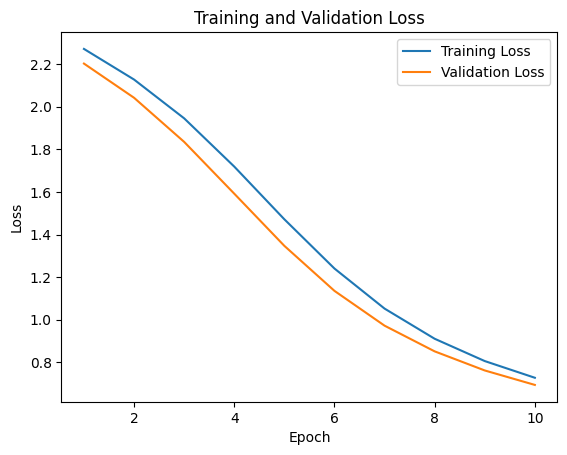

In [56]:
# @title Sample solution (Try not to peek until you've given it a good try!')
params = batch_gradient_descent(cross_entropy_softmax_loss, initial_params, training_data, val_data, learning_rate=0.01, num_epochs=10, batch_size=1000)

#### Evaluating the model
So far the only metric we have used to evaluate the performance of our model has been the loss function. However, when training a machine learning model, several other metrics can be used to assess the performance of the model. Furthermore, hyper-parameters are generally selected (fine-tuned) based on the most important metric we want to optimise. Below are some metrics that can be used for classification tasks.
*   **Accuracy**: This is the most common metric generally used in classification. It is a measure of the proportion of instances classified correctly. $$ \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$

* **Precision**: This is a measure of the number of positive predictions. For example, if our model predicts 100 data points to belong to class 1, the precision is the percentage of these 100 data points that effectively belong to class 1. High precision is maybe necessary for example in medical diagnosis, where we don't want to make a wrong diagnosis on patients that leads to unnecessary treatment.

* **Recall**: This is a measure of the model's ability to efficiently identify all positive instances. For example, if the dataset has 100 data points belonging to class 1, how many are effectively classified to belong to class 1? The recall is crucial in cases where we don't want to miss any positive instance. For example, if we have a security company, we don't want to wrongly classify the signal from a user as being safe while he is actually in danger.

**Let's use accuracy to evaluate the performance of our trained classifier.**

Firstly let's define a prediction function that transforms the model output to class. Recall the output of the classifier is logits which correspond to unnormalised probabilities belonging to each class. Thus the predicted class is the one with the highest probability    

**Code Task**
  1. Implement a function `model_predict` that selects the appropriate class from the output of the model.

In [ ]:
# @title Your code here
def model_predict(params, X):
    """Use the model for predicition

      args:
        params: model parameters
        X: features array (num_samples, num_features)

      return
        pred: predicted class (num_samples, 1)
    """

    # call the model to compute the logits
    logits = model... # update me
    preds = ... # update me: hint use jnp.argmax

    return preds

In [ ]:
# @title Run to test your code
def test_model_predict():
    features = val_data[0][0:10]
    preds = model_predict(params, features)
    expected = jnp.argmax(model.apply(params, features), axis=-1)
    assert jnp.array_equal(preds, expected), "Failed! try again"
    print("Nice! Your answer looks correct.")

test_model_predict()

In [59]:
# @title Solution model predict (Try not to peek until you've given it a good try!')
def model_predict(params, X):
    """Use the model for predicition

      args:
        params: model parameters
        X: features array (num_samples, num_features)

      return
        pred: predicted class (num_samples, 1)
    """

    # call the model to compute the logits
    logits = model.apply(params, X)
    preds = jnp.argmax(logits, axis=-1)

    return preds

In [60]:
# @title Compute the accuray of your model
def compute_accuracy(data):
  """Compute the accuracy of the model"""

  X, y_true = data
  y_pred = model_predict(params, X).squeeze()

  acc = sum(y_pred==y_true)/len(y_true)

  return acc

train_acc = compute_accuracy(training_data)
val_acc = compute_accuracy(val_data)
print(f"The training accuracy is {train_acc} while the validation accuracy is {val_acc}")

The training accuracy is 0.8274464011192322 while the validation accuracy is 0.8309999704360962


Congratulations, we've just trained a machine learning model for classification using the popular mnist digit dataset.

**Take home challenge**:
- Are you satisfied with the accuracy of your model?
- What can you do to improve the accuracy of the model?

## Conclusion
**Summary:**

- Machine learning is the science of using data to build intelligent systems.
- Deep learning is the subset of machine learning methods that uses neural networks.
- Optimisation is the process of finding the parameters that make the loss of a function as small as possible.
- JAX is a new popular framework that can be used to compute derivatives and train machine learning models.  


**References:**

1. https://d2l.ai/chapter_linear-networks/linear-regression.html
2. https://www.simplilearn.com/tutorials/artificial-intelligence-tutorial/ai-vs-machine-learning-vs-deep-learning
3. https://www.javatpoint.com/machine-learning

### Appendix

### Basis of JAX [OPTIONAL]
Jax is very similar to numpy but they are some important minor differences we need to be aware of.

Similarities between JAX and Numpy

In [61]:
# Create NumPy arrays
np_array1 = np.array([1, 2, 3])
np_array2 = np.array([4, 5, 6])

# Create JAX arrays
jax_array1 = jnp.array([1, 2, 3])
jax_array2 = jnp.array([4, 5, 6])

# Element-wise addition using NumPy
np_result = np_array1 + np_array2
print("NumPy result:", np_result)

# Element-wise addition using JAX
jax_result = jax_array1 + jax_array2
print("JAX result:", jax_result)

NumPy result: [5 7 9]
JAX result: [5 7 9]


In [62]:
# Array concatenation using NumPy
np_array1 = np.array([1, 2, 3])
np_array2 = np.array([4, 5, 6])
np_concatenated = np.concatenate([np_array1, np_array2])

# Array concatenation using JAX
jax_array1 = jnp.array([1, 2, 3])
jax_array2 = jnp.array([4, 5, 6])
jax_concatenated = jnp.concatenate([jax_array1, jax_array2])

In [63]:
# Element-wise functions using NumPy
np_array = np.array([0, np.pi/2, np.pi])
np_sin = np.sin(np_array)

# Element-wise functions using JAX
jax_array = jnp.array([0, jnp.pi/2, jnp.pi])
jax_sin = jnp.sin(jax_array)

In [64]:
# Reduction operations using NumPy
np_array = np.array([1, 2, 3])
np_sum = np.sum(np_array)
np_mean = np.mean(np_array)

# Reduction operations using JAX
jax_array = jnp.array([1, 2, 3])
jax_sum = jnp.sum(jax_array)
jax_mean = jnp.mean(jax_array)

JAX and NumPy - Differences ❌

Although JAX and NumPy have some similarities, they do have some important differences:
- Jax arrays are **immutable** (they can't be modified after they are created).
- The way they handle **randomness** -- JAX handles randomness explicitly.



JAX arrays are immutable, while NumPy arrays are not.

JAX and NumPy arrays are often interchangeable, **but** Jax arrays are **immutable** (they can't be modified after they are created). Allowing mutations makes transforms difficult and violates conditions for [pure functions](https://en.wikipedia.org/wiki/Pure_function).

Let's see this in practice by changing the number at the beginning of an array.

In [65]:
# NumPy: mutable arrays
x = np.arange(10)
x[0] = 10
print(x)

[10  1  2  3  4  5  6  7  8  9]


Let's try this in JAX.

In [66]:
# JAX: immutable arrays
# Should raise an error.
try:
    x = jnp.arange(10)
    x[0] = 10
except Exception as e:
    print("Exception {}".format(e))

Exception '<class 'jaxlib.xla_extension.ArrayImpl'>' object does not support item assignment. JAX arrays are immutable. Instead of ``x[idx] = y``, use ``x = x.at[idx].set(y)`` or another .at[] method: https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html


So it fails! We can't mutate a JAX array once it has been created. To update JAX arrays, we need to use [helper functions](https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html) that return an updated copy of the JAX array.

Instead of doing this `x[idx] = y`, we need to do this `x = x.at[idx].set(y)`.

In [67]:
x = jnp.arange(10)
new_x = x.at[0].set(10)
print(f" new_x: {new_x} original x: {x}")

 new_x: [10  1  2  3  4  5  6  7  8  9] original x: [0 1 2 3 4 5 6 7 8 9]


Note here that `new_x` is a copy and that the original `x` is unchanged.

Randomness in NumPy vs JAX

JAX is more explicit in Pseudo Random Number Generation (PRNG) than NumPy and other libraries (such as TensorFlow or PyTorch). [PRNG](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) is the process of algorithmically generating a sequence of numbers, which *approximate* the properties of a sequence of random numbers.  

Let's see the differences in how JAX and NumPy generate random numbers.

In Numpy, PRNG is based on a global `state`

Let's set the initial seed.

In [68]:
# Set random seed
np.random.seed(42)
prng_state = np.random.get_state()

In [69]:
# @title Helper function to compare prng keys (Run Cell)
def is_prng_state_the_same(prng_1, prng_2):
    """Helper function to compare two prng keys."""
    # concat all elements in prng tuple
    list_prng_data_equal = [(a == b) for a, b in zip(prng_1, prng_2)]
    # stack all elements together
    list_prng_data_equal = np.hstack(list_prng_data_equal)
    # check if all elements are the same
    is_prng_equal = all(list_prng_data_equal)
    return is_prng_equal

Let's take a few samples from a Gaussian (normal) Distribution and check if PRNG keys/global state change.

In [70]:
print(
    f"sample 1 = {np.random.normal()} Did prng state change: {not is_prng_state_the_same(prng_state,np.random.get_state())}"
)
prng_state = np.random.get_state()
print(
    f"sample 2 = {np.random.normal()} Did prng state change: {not is_prng_state_the_same(prng_state,np.random.get_state())}"
)
prng_state = np.random.get_state()
print(
    f"sample 3 = {np.random.normal()} Did prng state change: {not is_prng_state_the_same(prng_state,np.random.get_state())}"
)

sample 1 = 0.4967141530112327 Did prng state change: True
sample 2 = -0.13826430117118466 Did prng state change: True
sample 3 = 0.6476885381006925 Did prng state change: True


Numpy's global random state is updated every time a random number is generated, so *sample 1 != sample 2 != sample 3*.

Having the state automatically updated, makes it difficult to handle randomness in a **reproducible** way across different threads, processes and devices.

In JAX, PRNG is explicit.

In JAX, for each random number generation, you need to explicitly pass in a random key/state.

Passing the same state/key results in the same number being generated. This is generally undesirable.

In [71]:
from jax import random

key = random.PRNGKey(42)
print(f"sample 1 = {random.normal(key)}")
print(f"sample 2 = {random.normal(key)}")
print(f"sample 3 = {random.normal(key)}")

sample 1 = -0.1847117692232132
sample 2 = -0.1847117692232132
sample 3 = -0.1847117692232132


To generate different and independent samples, you need to manually split the keys.

In [72]:
from jax import random

key = random.PRNGKey(42)
print(f"sample 1 = {random.normal(key)}")

# We split the key -> new key and subkey
new_key, subkey = random.split(key)

# We use the subkey immediately and keep the new key for future splits.
# It doesn't really matter which key we keep and which one we use immediately.
print(f"sample 2 = {random.normal(subkey)}")

# We split the new key -> new key2 and subkey
new_key2, subkey = random.split(new_key)
print(f"sample 3 = {random.normal(subkey)}")

sample 1 = -0.1847117692232132
sample 2 = 1.369469404220581
sample 3 = -0.19947023689746857


By using JAX, we can more easily reproduce random number generation in parallel across threads, processes, or even devices by explicitly passing and keeping track of the prng key (without relying on a global state that automatically gets updated).

### Derivation of partial derivatives for exercise 2 [OPTIONAL]
Derive $\frac{\partial \mathcal{L}}{\partial \mathbf{w}}$:
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = \frac{ \partial}{\partial \mathbf{w}} (\frac{1}{m} \sum_{i=1}^m (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2) \quad \text{: Definition of $\mathcal{L}$} \\
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = \frac{1}{m} \frac{ \partial }{\partial \mathbf{w}} ( \sum_{i=1}^m (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2) \quad \text{: Constant multiple rule} \\
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = \frac{1}{m} \sum_{i=1}^m \frac{ \partial }{\partial \mathbf{w}} (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2 \quad \text{: Sum Rule - derivative of sum is sum of derivatives.} \\
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = \frac{1}{m} \sum_{i=1}^m 2 (y_i - (\mathbf{w}^T \mathbf{x}_i + b)) \frac{ \partial }{\partial \mathbf{w}}(y_i -(\mathbf{w}^T \mathbf{x}_i + b))  \quad \text{: Power Rule + Chain Rule.} \\
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = \frac{1}{m} \sum_{i=1}^m 2 (y_i - (\mathbf{w}^T \mathbf{x}_i + b)) (-\mathbf{x}_i)  \quad \text{: Compute derative.} \\
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = \frac{2}{m} \sum_{i=1}^m (y_i - (\mathbf{w}^T \mathbf{x}_i + b)) (-\mathbf{x}_i)  \quad \text{: Factor constant out of summation.} \\
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} & = \frac{2}{m} \sum_{i=1}^m \mathbf{x}_i((\mathbf{w}^T \mathbf{x}_i + b) -y_i ) \quad \text{: Rearrange.} \\  
\end{aligned}

Derive $\frac{\partial \mathcal{L}}{\partial b}$:
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial b} & = \frac{ \partial}{\partial b} (\frac{1}{m} \sum_{i=1}^m (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2) \quad \text{: Definition of $\mathcal{L}$} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{m} \frac{ \partial }{\partial b} ( \sum_{i=1}^m (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2) \quad \text{: Constant multiple rule} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{m} \sum_{i=1}^m \frac{ \partial }{\partial b} (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2 \quad \text{: Sum Rule - derivative of sum is sum of derivatives.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{m} \sum_{i=1}^m 2 (y_i - (\mathbf{w}^T \mathbf{x}_i + b)) \frac{ \partial }{\partial b}(y_i -(\mathbf{w}^T \mathbf{x}_i + b))  \quad \text{: Power Rule + Chain Rule.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{1}{m} \sum_{i=1}^m 2 (y_i - (\mathbf{w}^T \mathbf{x}_i + b)) (-1)  \quad \text{: Compute derative.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{2}{m} \sum_{i=1}^m (y_i - (\mathbf{w}^T \mathbf{x}_i + b)) (-1)  \quad \text{: Factor constant out of summation.} \\
\frac{\partial \mathcal{L}}{\partial b} & = \frac{2}{m} \sum_{i=1}^m ((\mathbf{w}^T \mathbf{x}_i + b) -y_i ) \quad \text{: Rearrange.} \\  
\end{aligned}

### Intuition for multi-class CE loss: exercise 3 [OPTIONAL]

For binary classifies we use the following formula for the cross entropy loss
 $$ -y_i \log(p_i) - (1-y_i) \log (1-p_i).$$

Recall in binary classier we have one class, so the output of our model is the probability, $p$ of belonging to that class. Instead, we can treat our binary classifier as two classes defined as follows
  - Class 1: Belonging to the class in question.
  - Class 2: Not belonging to the class.

Then if the probability for the data point $y$_i of belonging to Class 1 is $p$_i, this means its probability of not belonging to Class 1 which is equivalent to belonging to Class 2 is $(1-p_i)$. Anagoulsy since target values are one hot encoded for a multi-class classification if $y_i$ is the label that it indicates if the data point belongs to Class 1 or not the corresponding label for belonging to Class 2 will be $(1 - y_i)$. Hence we can rewrite our cross entropy loss in compact form as follows
$$ \sum_c -y^c_i \log(p^c_i).$$